# Regression model evaluation

### RMSE and R^2, your new best friends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from regprepare import get_auto_mpg, train_val_test

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = get_auto_mpg()
df.head()

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [3]:
train, val, test = train_val_test(df, stratify='mpg')
train.shape, val.shape, test.shape

((235, 9), (78, 9), (79, 9))

### Establish baseline and model predictions

The baseline is the mean of the actual values.

A basic LinearRegression model will be used to make predictions.

In [4]:
baseline = round(train['mpg'].mean(), 2)

In [5]:
preds = train[['horsepower', 'mpg']]

In [6]:
preds['baseline_preds'] = baseline
preds.head()

,horsepower,mpg,baseline_preds
212,180.0,16.5,23.5
346,67.0,32.3,23.5
325,48.0,44.3,23.5
90,198.0,12.0,23.5
246,52.0,32.8,23.5


In [7]:
ols_model = LinearRegression()

ols_model.fit(train[['horsepower']], train[['mpg']])

LinearRegression()

In [8]:
preds['yhat'] = ols_model.predict(train[['horsepower']])
preds.head()

,horsepower,mpg,baseline_preds,yhat
212,180.0,16.5,23.5,11.058302
346,67.0,32.3,23.5,30.114463
325,48.0,44.3,23.5,33.318596
90,198.0,12.0,23.5,8.022807
246,52.0,32.8,23.5,32.644042


### Compute residuals

Predictions minus actual

In [9]:
preds['baseline_res'] = preds['baseline_preds'] - preds['mpg']
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res
212,180.0,16.5,23.5,11.058302,7.0
346,67.0,32.3,23.5,30.114463,-8.8
325,48.0,44.3,23.5,33.318596,-20.8
90,198.0,12.0,23.5,8.022807,11.5
246,52.0,32.8,23.5,32.644042,-9.3


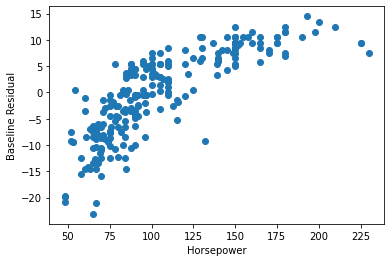

In [10]:
plt.scatter(preds['horsepower'], preds['baseline_res'])
plt.xlabel('Horsepower')
plt.ylabel('Baseline Residual')
plt.show()

In [11]:
preds['yhat_res'] = preds['yhat'] - preds['mpg']
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res
212,180.0,16.5,23.5,11.058302,7.0,-5.441698
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404
90,198.0,12.0,23.5,8.022807,11.5,-3.977193
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958


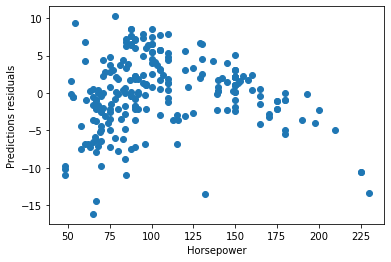

In [12]:
plt.scatter(preds['horsepower'], preds['yhat_res'])
plt.xlabel('Horsepower')
plt.ylabel('Predictions residuals')
plt.show()

### Compute SSE

SSE - Sum of Squared Errors

Also known as the RSS - Residual Sum of Squares

Predicted minus actual, squared and summed

In [13]:
preds.columns

Index(['horsepower', 'mpg', 'baseline_preds', 'yhat', 'baseline_res',
       'yhat_res'],
      dtype='object')

In [14]:
preds['baseline_res_squared'] = preds['baseline_res'] ** 2
preds['yhat_res_squared'] = preds['yhat_res'] ** 2
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323


In [15]:
sse_baseline = preds['baseline_res_squared'].sum()
sse_yhat = preds['yhat_res_squared'].sum()
sse_baseline, sse_yhat

(15330.830000000002, 5355.469277811718)

### Compute MSE

MSE - Mean Squared Error

Divide the SSE by the total number of data points

In [16]:
mse_baseline = sse_baseline / len(preds)
mse_yhat = sse_yhat / len(preds)
mse_baseline, mse_yhat

(65.23757446808511, 22.789230969411566)

### Compute RMSE

RMSE - Root Mean Squared Error

Take the square root of the MSE

In [17]:
rmse_baseline = sqrt(mse_baseline)
rmse_yhat = sqrt(mse_yhat)
rmse_baseline, rmse_yhat

(8.076978052965423, 4.773806758700185)

### Doing it all with the sklearn library

mean_squared_error

In [18]:
preds.columns

Index(['horsepower', 'mpg', 'baseline_preds', 'yhat', 'baseline_res',
       'yhat_res', 'baseline_res_squared', 'yhat_res_squared'],
      dtype='object')

In [19]:
sqrt(mean_squared_error(preds['mpg'], preds['baseline_preds']))

8.076978052965423

In [20]:
sqrt(mean_squared_error(preds['yhat'], preds['mpg']))

4.773806758700185

In [21]:
mean_squared_error(preds['yhat'], preds['mpg'], squared=False)

4.773806758700185

### Model significance

Calculating the R^2 value by hand

R^2 = ESS / TSS

### Compute ESS

ESS - Explained Sum of Squares

Prediction minus mean of actual values, squared and summed

In [22]:
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323


In [23]:
preds['yhat_mean_res'] = preds['yhat'] - preds['baseline_preds']
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081,-12.441698
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574,6.614463
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236,9.818596
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065,-15.477193
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323,9.144042


In [24]:
preds['yhat_mean_res_squared'] = preds['yhat_mean_res'] ** 2
preds.head()

,horsepower,mpg,baseline_preds,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res,yhat_mean_res_squared
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081,-12.441698,154.795859
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574,6.614463,43.751116
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236,9.818596,96.404826
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065,-15.477193,239.543505
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323,9.144042,83.613496


In [25]:
ess_baseline = 0
ess_yhat = preds['yhat_mean_res_squared'].sum()
ess_yhat

9975.360722188278

### Compute TSS

TSS - Total Sum of Squares

ESS + SSE

In [26]:
tss_baseline = sse_baseline + ess_baseline

In [27]:
tss_yhat = sse_yhat + ess_yhat

### Putting it all together

In [28]:
ess_baseline / tss_baseline

0.0

In [29]:
ess_yhat / tss_yhat

0.6506732330988134

### Using the sklearn library instead

explained_variance_score

In [30]:
explained_variance_score(preds['mpg'], preds['yhat'])

0.6506731545601601